In [ ]:
# разбейте исходную таблицу на 2: по полу пассажиров
# удалите пустые строки или заполните их соответствующими символами
# Построить гистограмму распределения пассажиров по возрасту
# Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
# визуализировать возраст при помощи различных настроек метода plot

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из csv
df = pd.read_csv("titanic.csv")

In [33]:
# Удаление пустых строк
df_cleaned = df.dropna()

In [34]:
# Разделение по полам
male_df = df_cleaned[df_cleaned['Sex'] == 'male']
female_df = df_cleaned[df_cleaned['Sex'] == 'female']

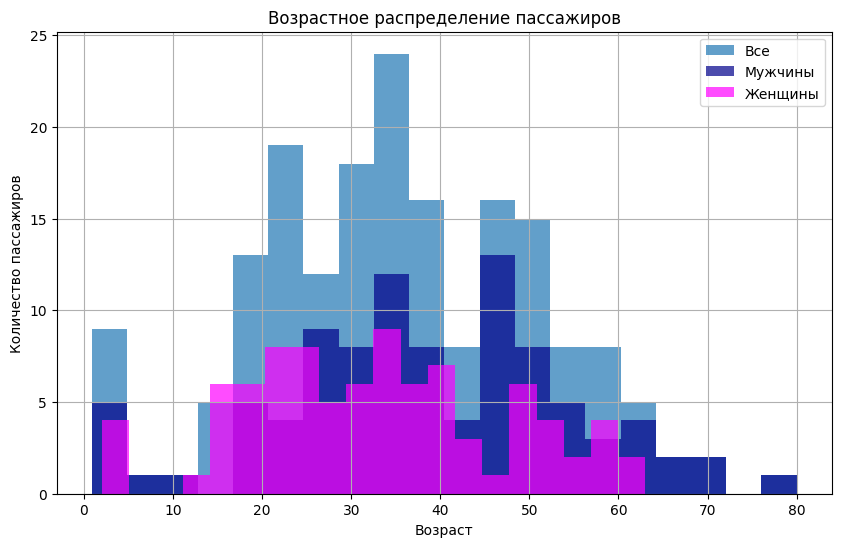

In [35]:
# Построение гистограммы распределения пассажиров по возрасту
plt.figure(figsize=(10, 6))
df_cleaned['Age'].hist(bins=20, alpha=0.7, label='Все')
male_df['Age'].hist(bins=20, alpha=0.7, label='Мужчины', color='darkblue')
female_df['Age'].hist(bins=20, alpha=0.7, label='Женщины', color='fuchsia')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Возрастное распределение пассажиров')
plt.legend()
plt.show()

In [36]:


def calculate_age_stats(df, gender):
    """Вычисляет и выводит статистику возраста для заданного пола."""
    age_stats = df['Age'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
    age_stats = age_stats.rename({'<lambda_0>': 'mode'}) # Переименование столбца с модой
    print(f"{gender.capitalize()} Статистика возраста:")
    print(age_stats.to_string(), "\n") # Более аккуратный вывод

# Пример использования (предполагается, что male_df и female_df уже определены):
calculate_age_stats(male_df, 'Мужчины')
calculate_age_stats(female_df, 'Женщины')



Мужчины Статистика возраста:
min          0.920000
max         80.000000
mean        38.451789
median      37.000000
<lambda>    36.000000 

Женщины Статистика возраста:
min          2.000000
max         63.000000
mean        32.676136
median      32.250000
<lambda>    24.000000 



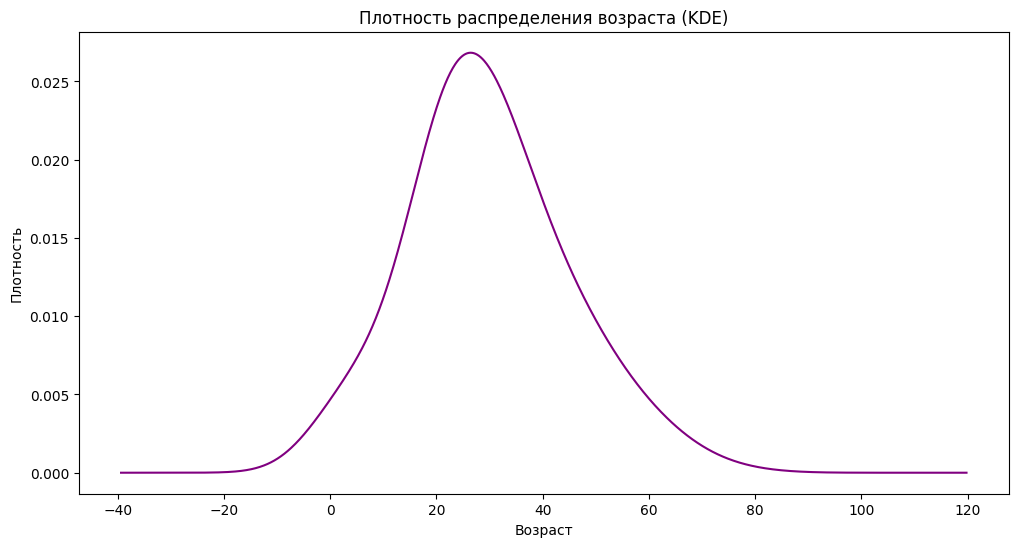

In [37]:
# визуализировать возраст при помощи различных настроек метода plot
plt.figure(figsize=(12, 6))
df['Age'].plot.kde(bw_method=0.5, color='purple') # bw_method - ширина полосы пропускания
plt.title('Плотность распределения возраста (KDE)')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()



In [38]:
# изменение типов данных таблицы
# my_series = pd.to_numeric(my_series)
# s = s.astype(np.float16) # for series
#
# df.drop(columns=['col1', 'col2']) # drop columns
# df.drop([0, 1])# drop rows

In [39]:
# Изменение типов данных в таблице
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].astype(np.float16)

# Проверка изменений
print(df.dtypes)

# Удаление нескольких колонок
df = df.drop(columns=['Cabin', 'Ticket'])

# Удаление строк по индексу
df = df.drop([0, 1])

# Проверка результата
print(df.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float16
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male   NaN      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

      Fare Embarke